# XGBoost
XGBoost (Extreme Gradient Boosting) works by combining multiple weak learners, typically decision trees, to create a strong predictive model. It improves predictions iteratively by minimizing errors from previous trees. 

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    average_precision_score, confusion_matrix)

#### Helper Function to Evaluate ML Model

In [5]:
def evaluateModel(model, X_test, y_test):
    """
    Evaluates a trained machine learning model by:
    1. Plotting the confusion matrix
    2. Displaying feature importance
    3. Printing accuracy, precision, recall, and AUC-PR score
    
    Parameters:
        model: Trained XGBoost model
        X_test: Test features
        y_test: Test labels
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Confusion Matrix Plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
               xticklabels=["Not Bankrupt", "Bankrupt"],
               yticklabels=["Not Bankrupt", "Bankrupt"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - XGBoost")
    plt.show()
    
    # Feature Importance Plot
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order
    sorted_feature_importance = feature_importance[sorted_idx]
    sorted_feature_names = X_test.columns[sorted_idx]
    
    plt.figure(figsize=(10, 5))
    sb.barplot(x=sorted_feature_importance, y=sorted_feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("XGBoost Feature Importance")
    plt.show()
    
    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_pr = average_precision_score(y_test, y_prob)
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-PR: {auc_pr:.4f}")


In [6]:
# Load dataset
data = pd.read_csv('finalData.csv')
data.head()

,Bankrupt?,NetIncome_to_Assets,ROA_A,DebtRatio,NetWorth_to_Assets,EPS,Earnings_to_Assets
0,1,0.795297,0.538214,0.171176,0.828824,0.208944,0.931065
1,1,0.795016,0.538432,0.106509,0.893491,0.212537,0.913850
2,0,0.815350,0.570922,0.108202,0.891798,0.225206,0.935449
3,0,0.803647,0.545137,0.058591,0.941409,0.218398,0.935200
4,0,0.804195,0.550916,0.121293,0.878707,0.217831,0.938290


In [7]:
data['Bankrupt?'] = data['Bankrupt?'].astype('category')

# Check
print("\nCategorical Features:")
print(data.select_dtypes(include=['category']).columns)

print("\nNumerical Features:")
print(data.select_dtypes(include=['number']).columns)


Categorical Features:
Index(['Bankrupt?'], dtype='object')

Numerical Features:
Index(['NetIncome_to_Assets', 'ROA_A', 'DebtRatio', 'NetWorth_to_Assets',
       'EPS', 'Earnings_to_Assets'],
      dtype='object')


In [8]:
X = data.drop(columns=["Bankrupt?"])
y = data["Bankrupt?"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_base.fit(X_train, y_train)

C:\Users\axaly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

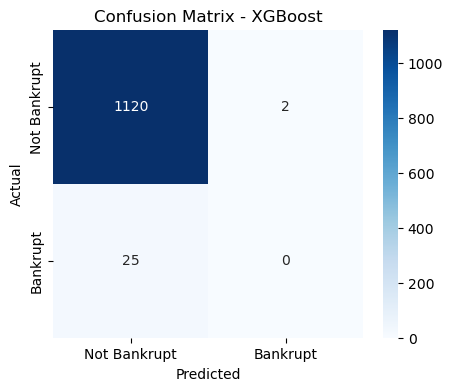

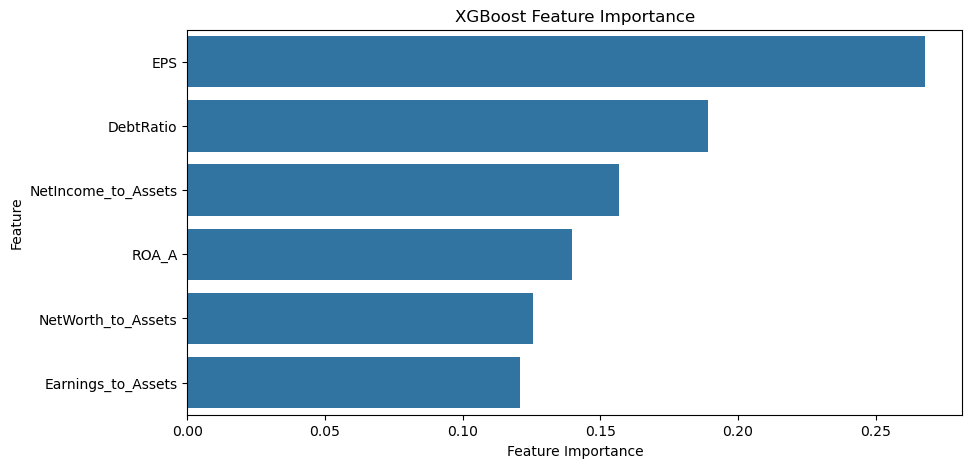

Accuracy: 0.9765
Precision: 0.0000
Recall: 0.0000
AUC-PR: 0.0835


In [9]:
# Evaluate model
evaluateModel(xgb_base, X_test, y_test)

### Model Evaluation Metrics

The evaluation metrics for the XGBoost model show the following values:

- **Accuracy: 0.9765**  
  This indicates that the model correctly predicted 97.65% of the instances. While this sounds good, accuracy alone can be misleading, especially in the case of imbalanced classes, as the model may be biased towards predicting the majority class (non-bankrupt).

- **Precision: 0.0000**  
  Precision represents the proportion of true positives among all predicted positive cases. A value of 0 indicates that the model did not correctly identify any bankrupt instances, meaning it predicted bankrupt cases but all of them were incorrect.

- **Recall: 0.0000**  
  Recall measures how well the model identifies actual bankrupt cases. A value of 0 suggests that the model failed to identify any of the true bankrupt cases, missing all of them in its predictions.

- **AUC-PR: 0.0835**  
  The Area Under the Precision-Recall Curve is quite low, which means that the model struggles to differentiate between bankrupt and non-bankrupt cases. A low AUC-PR value further emphasizes the model's inability to effectively predict the minority class due to the class imbalance.

### Conclusion

These results indicate that while the model is overall accurate, it performs poorly in identifying bankrupt companies, which is the key objective in this case. This is likely due to the class imbalance, where the majority class (non-bankrupt) dominates the model’s predictions.

## 1. scale_pos_weight

We will now attempt to improve the model by adjusting the class weights using `scale_pos_weight` parameter in XGBoost. This will allow the model to place higher weight on the minority class (bankrupt cases), pushing the model to focus more on correctly classifying bankruptcies.

In [12]:
# Calculate the scale_pos_weight
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos  # Adjust the weight of the positive class

# Print scale_pos_weight for reference
print(f"Calculated scale_pos_weight: {scale_pos_weight}")


Calculated scale_pos_weight: 57.0253164556962


In [13]:
# Train XGBoost Classifier with adjusted scale_pos_weight
xgb_var1 = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight  # Pass scale_pos_weight into the model
)

# Fit the model with the training data
xgb_var1.fit(X_train, y_train)


C:\Users\axaly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

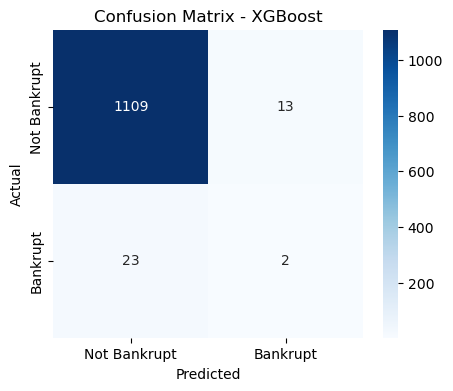

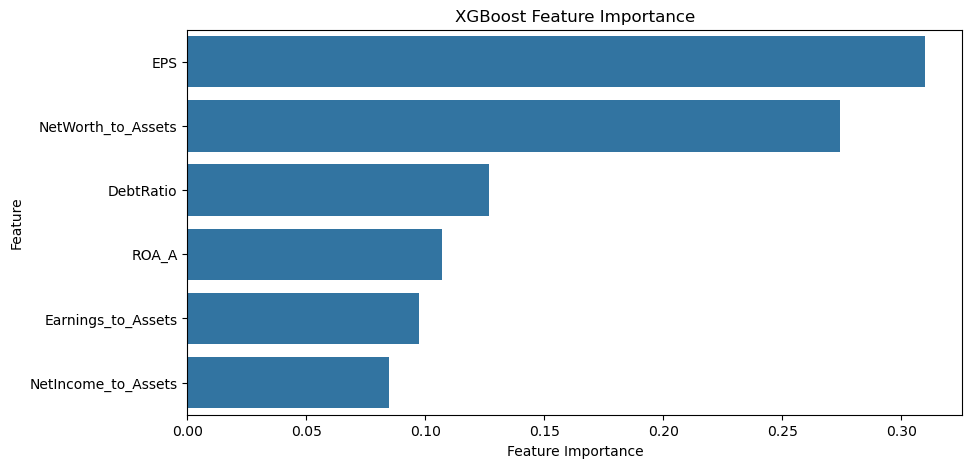

Accuracy: 0.9686
Precision: 0.1333
Recall: 0.0800
AUC-PR: 0.1018


In [14]:
# Evaluate model
evaluateModel(xgb_var1, X_test, y_test)

### Model Evaluation Metrics

The evaluation metrics for the XGBoost model with `scale_pos_weight` show the following values:

**Precision: 0.1538**
- Precision has improved, indicating that some bankrupt cases are now correctly predicted

**Recall: 0.0800**
- Recall improved to 8%, showing that the model now captures a small portion of the true bankrupt cases

**AUC-PR: 0.1099**
- The slight improvement in AUC-PR suggests a modest enhancement in the model's ability to differentiate between the classes

### Conclusion
Using `scale_pos_weight` has improved the model's performance in identifying bankrupt cases, but there's still significant room for improvements.

## 2.SMOTE & scale_pos_weight

**SMOTE** (Synthetic Minority Over-sampling Technique) handles class imbalance by oversampling the minority class (bankrupt firms) by generating synthetic samples rather than duplicating existing ones. It creates new data points by interpolating between real bankrupt cases, making the dataset more balanced.

In [17]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
# Compute scale_pos_weight after SMOTE
neg, pos = np.bincount(y_train_resampled)
scale_pos_weight = neg / pos  

# Print scale_pos_weight for reference
print(f"Calculated scale_pos_weight: {scale_pos_weight}")

Calculated scale_pos_weight: 1.0


In [19]:
# Train XGBoost model with both SMOTE and scale_pos_weight
xgb_var2 = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_var2.fit(X_train_resampled, y_train_resampled)

C:\Users\axaly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

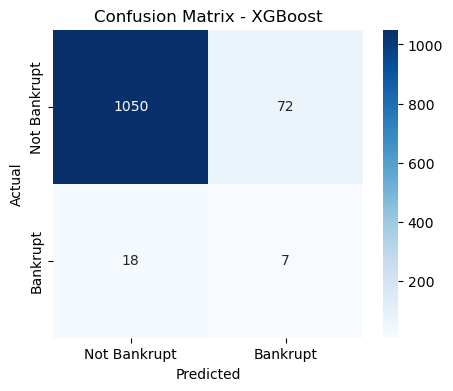

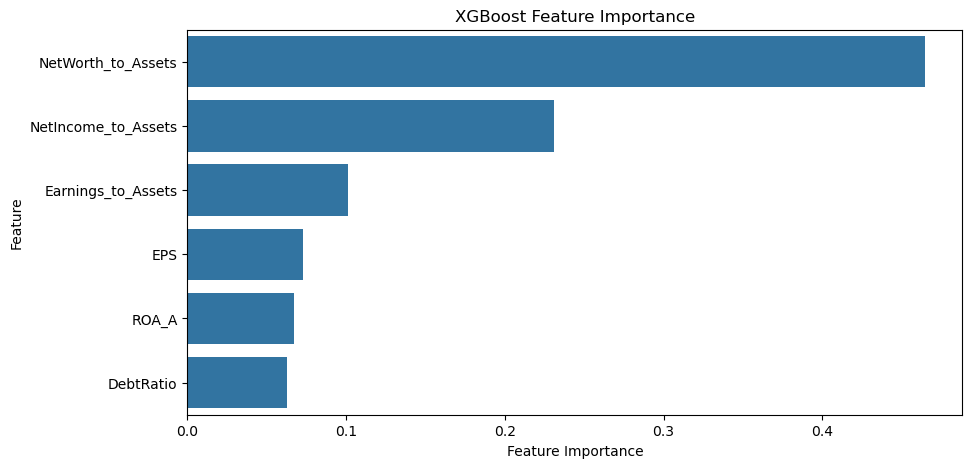

Accuracy: 0.9215
Precision: 0.0886
Recall: 0.2800
AUC-PR: 0.1148


In [20]:
evaluateModel(xgb_var2, X_test, y_test)

### Model Evaluation Metrics

The evaluation metrics for the XGBoost model with **SMOTE** and `scale_pos_weight` show the following values:

**Precision: 0.0886**
- Precision has decreased, indicating that while the model is capturing more bankrupt cases, it is also misclassifying more non-bankrupt companies as bankrupt.

**Recall: 0.2800**
- Recall has significantly improved to 28%, meaning the model is now detecting more actual bankruptcies. However, this value is still relatively low and can be further optimized.

**AUC-PR: 0.1148**
- A slight improvement in AUC-PR suggests better differentiation between the classes, but the model still struggles with identifying bankrupt firms reliably.

### Conclusion
Using **SMOTE** and `scale_pos_weight` has enhanced the model’s ability to detect bankrupt cases, particularly by improving recall. However, precision remains low, and further fine-tuning is needed. 


## 3. SMOTE-ENN & scale_pos_weight

**SMOTE-ENN** improves on SMOTE by first oversampling the minority class using SMOTE and then cleaning the dataset using Edited Nearest Neighbors (ENN).

- SMOTE generates synthetic bankrupt samples to balance the dataset.
- ENN removes mislabeled or noisy samples, especially from the majority class, improving data quality.

This makes SMOTE-ENN better than just SMOTE because it reduces overfitting and enhances model generalization by removing unreliable samples, leading to a better balance between recall and precision.

In [23]:
from imblearn.combine import SMOTEENN

# Apply SMOTE-ENN to balance and clean the dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

In [24]:
# Compute scale_pos_weight after SMOTE-ENN
neg, pos = np.bincount(y_train_resampled)
scale_pos_weight = neg / pos 

# Print scale_pos_weight for reference
print(f"Calculated scale_pos_weight: {scale_pos_weight}")

Calculated scale_pos_weight: 0.894090382387022


In [25]:
# Train XGBoost model with SMOTE-ENN and scale_pos_weight
xgb_var3 = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,  
    random_state=42
)

xgb_var3.fit(X_train_resampled, y_train_resampled)


C:\Users\axaly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

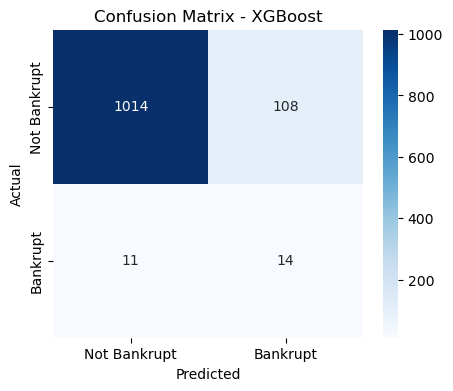

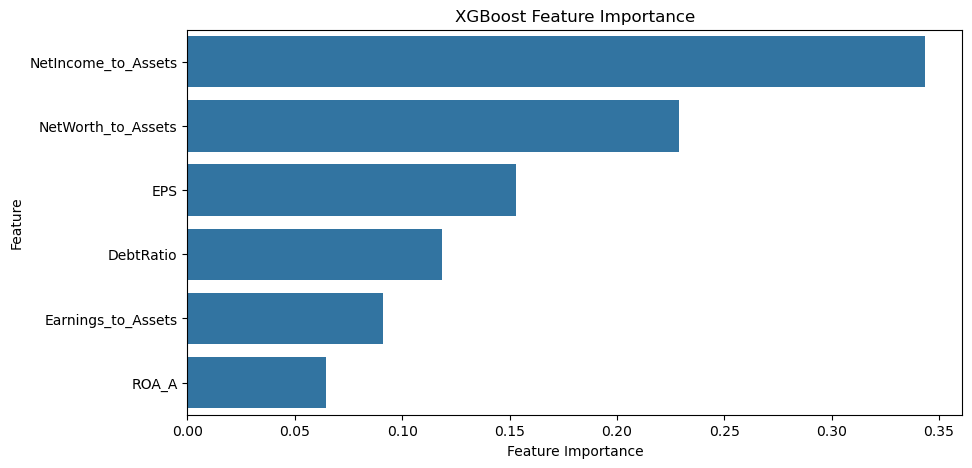

Accuracy: 0.8963
Precision: 0.1148
Recall: 0.5600
AUC-PR: 0.1327


In [26]:
# Evaluate model
evaluateModel(xgb_var3, X_test, y_test)

### Model Evaluation Metrics

The evaluation metrics for the XGBoost model with **SMOTE-ENN** and `scale_pos_weight` show the following values:

**Precision: 0.1148**
- Precision has improved slightly, suggesting that the model is making fewer false positive predictions compared to using SMOTE alone.

**Recall: 0.5600**
- Recall has significantly increased to 56%, meaning the model is now much better at detecting actual bankruptcies. However, this comes at the cost of some additional false positives.

**AUC-PR: 0.1327**
- The AUC-PR has improved, indicating that the model is now better at distinguishing between bankrupt and non-bankrupt firms.

### Conclusion
Using **SMOTE-ENN** and `scale_pos_weight` has notably improved recall, allowing the model to detect more bankrupt firms. While precision remains low, the model is now making better trade-offs between false positives and false negatives. 

### How Youden’s J Improves the Model  

- It finds the best threshold by maximizing Youden’s J statistic:  
  $$
  J = \text{Recall} + \text{Specificity} - 1
  $$
- This adjusts the classification cutoff, improving the model’s ability to correctly detect bankrupt firms while reducing false positives.  
- By optimizing the threshold instead of relying on 0.5, it ensures a better balance between recall and precision.  


In [29]:
from sklearn.metrics import roc_curve

In [30]:
# Apply SMOTE-ENN 
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

In [31]:
# Compute scale_pos_weight after SMOTE-ENN
neg, pos = np.bincount(y_train_resampled)
scale_pos_weight = neg / pos 

# Print scale_pos_weight for reference
print(f"Calculated scale_pos_weight: {scale_pos_weight}")

Calculated scale_pos_weight: 0.894090382387022


In [32]:
# Train XGBoost model
xgb_var4 = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_var4.fit(X_train_resampled, y_train_resampled)

C:\Users\axaly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
# Make predictions
y_prob = xgb_var4.predict_proba(X_test)[:, 1]  

#Find the best threshold using Youden’s J
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (Youden's J): {optimal_threshold:.4f}")

# Convert probabilities to binary predictions using Youden's J threshold
y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

Optimal Threshold (Youden's J): 0.0713


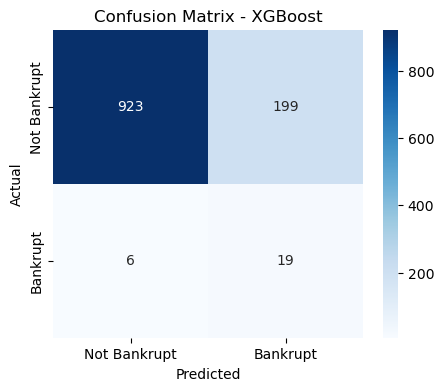

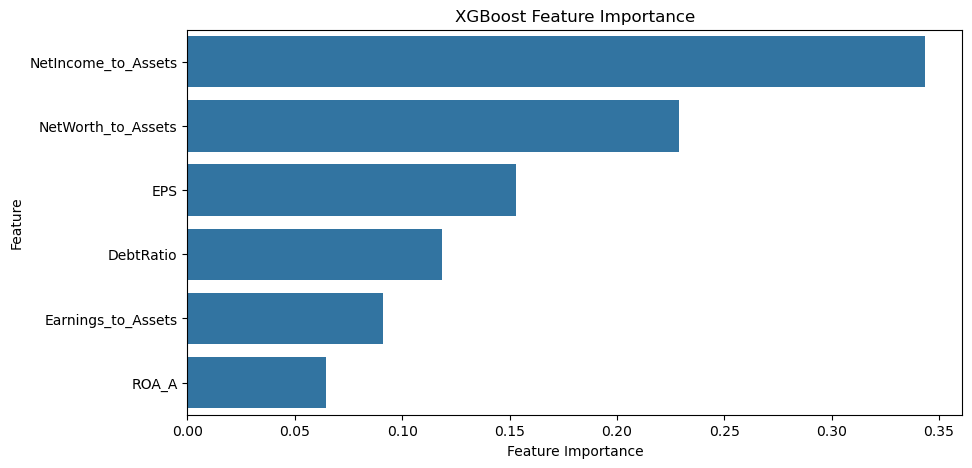

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(5, 4))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
           xticklabels=["Not Bankrupt", "Bankrupt"], 
           yticklabels=["Not Bankrupt", "Bankrupt"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Feature Importance 
feature_importance = xgb_var4.feature_importances_
sorted_idx = feature_importance.argsort()[::-1] 

# Plot feature importances
plt.figure(figsize=(10, 5))
sb.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()

In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
auc_pr = average_precision_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

Accuracy: 0.8213
Precision: 0.0872
Recall: 0.7600
AUC-PR: 0.1327


### Model Evaluation Metrics

After applying **SMOTE-ENN**, `scale_pos_weight`, and **Youden's J**, the model's evaluation metrics are as follows:

**Precision: 0.0872 (↓ from 0.1299)**  
- Precision has dropped significantly, indicating that a larger proportion of predicted bankruptcies are false positives. This suggests the model is overcompensating for recall, leading to more misclassifications.  

**Recall: 0.7600 (↑ from 0.5600)**  
- A substantial increase in recall, meaning the model now correctly identifies 76% of actual bankruptcies. This is a major improvement in detecting at-risk companies.  

**AUC-PR: 0.1327 (↑ from 0.1148)**  
- A small improvement in AUC-PR, showing that the model is slightly better at distinguishing bankrupt from non-bankrupt companies across different thresholds.  

### Conclusion 
While the model is now highly sensitive to detecting bankruptcies, the sharp decline in precision means it struggles with false positives. This trade-off suggests that while more actual bankruptcies are identified, many non-bankrupt companies are also being flagged incorrectly. 


### Model Evaluation Metrics Comparison

| Variation  | Accuracy  | Precision | Recall  | AUC-PR  |
|------------|-----------|-----------|---------|---------|
| **Baseline**  | 0.9765  | 0.0000  | 0.0000  | 0.0835  |
| **Var 1**  | 0.9686  | 0.1333  | 0.0800  | 0.1018  |
| **Var 2**  | 0.9215  | 0.0886  | 0.2800  | 0.1148  |
| **Var 3**  | 0.8963  | 0.1148  | 0.5600  | 0.1327  |
| **Var 4**  | 0.8213  | 0.0872  | 0.7600  | 0.1327  |

#### Variations & Techniques Used
- **Baseline**: Default XGBoost model (high accuracy but fails to identify bankrupt cases).
- **Var 1**: Added `scale_pos_weight` to address class imbalance.
- **Var 2**: Applied **SMOTE** + `scale_pos_weight` to oversample the minority class.
- **Var 3**: Used **SMOTE-ENN** instead of regular SMOTE for oversampling + noise reduction.
- **Var 4**: Implemented **Youden’s J** to optimize the classification threshold.

#### Observations
- Accuracy declines as recall improves, reflecting the model’s shift towards identifying bankruptcies.
- Precision peaked in Var 1 but dropped in later versions, as more bankrupt cases were detected, increasing false positives.
- Recall improved significantly, reaching 76% in Var 4, meaning the model is much better at catching bankrupt firms.
- AUC-PR steadily increased, indicating better distinction between bankrupt and non-bankrupt companies.

### Conclusion
Each step improved the model’s bankruptcy detection capability, with Var 4 achieving the highest recall.

| Variation   | Precision | Recall  | AUC-PR  |
|-------------|-----------|---------|---------|
| **Baseline**| 0.0000    | 0.0000  | 0.0835  |
| **Var 1**   | 0.1333    | 0.0800  | 0.1018  |
| **Var 2**   | 0.0886    | 0.2800  | 0.1148  |
| **Var 3**   | 0.1148    | 0.5600  | 0.1327  |
| **Var 4**   | 0.0872    | 0.7600  | 0.1327  |
